## Data loading - HDA
Source: https://arxiv.org/abs/2304.11685 (data fra CR)

Folder: accepted??
-  brug bare 'images' direkte - Umiddelbart ! 

Make suitable for MagFace (112x112)

In [1]:
# Load packages

# Common
import pandas as pd
import numpy as np
import os
import cv2 as cv
from IPython.display import clear_output as cls
import json

# Data 
from glob import glob

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Model



### Data folder structure and metadata

HDA

For each age group, load images and save metadata of information in df:
- age group
    - probes
        - images
            - im_id_M/F_ethnicity
    - references
        - images
            - im_id_M/F_ethnicity


In [2]:
root_dir = '../data/raw/HDA'

for age_folder in os.listdir(root_dir):
    if "age" in age_folder:
        print(age_folder)

age_group_1
age_group_0
age_group_2
age_group_4
age_group_3


In [3]:

# Extract information from image filename
image_name = os.path.splitext('19847_12_M_white_8.png')[0]
print(image_name)
image_info = image_name.split('_')
print(image_info)

image_id = image_info[0]
print(image_id)

image_gender = image_info[1]
image_ethnicity = image_info[2]

19847_12_M_white_8
['19847', '12', 'M', 'white', '8']
19847


In [4]:
# Data loading

# df med im_id, M/F, ethnicity, age 

import os
import re
from PIL import Image
import pandas as pd

# Define the root directory containing age group folders
root_dir = '../data/raw/HDA'

# Initialize lists to store image information
ids = []
age_maybe = []
genders = []
ethnicities = []
subid = []
age_group = []
probe = []

# Iterate through each age group folder
for age_folder in os.listdir(root_dir)[1:]:
    if "age_group" in age_folder:
        age_path = os.path.join(root_dir, age_folder)
        if os.path.isdir(age_path):
            # Iterate through subfolders in each age group folder (probe and references)
            for subfolder in os.listdir(age_path):
                subfolder_path = os.path.join(age_path, subfolder)
                if os.path.isdir(subfolder_path):
                    subfolder_path = subfolder_path + "/images/"
                    # Iterate through images in each subfolder
                    for image_file in os.listdir(subfolder_path):
                        if image_file.endswith('.png'):  # Assuming images are PNG format
                            image_path = os.path.join(subfolder_path, image_file)
                            
                            # Extract information from image filename
                            image_name = os.path.splitext(image_file)[0]
                            image_info = image_name.split('_')
                            image_id = image_info[0]
                            image_age_maybe = image_info[1]
                            image_gender = image_info[2]
                            image_ethnicity = image_info[3]
                            
                            # for probes: they have intraclass variation number 
                            try: 
                                image_subid = image_info[4] 
                            except: 
                                image_subid = 42
                                                        
                            # Assuming age is derived from the age folder name
                            age_match = re.search(r'\d+', age_folder)

                            # Check if a match is found
                            if age_match:
                                # Extract the matched integer
                                age_integer = int(age_match.group())
                            else:
                                print("No age information found in the string.")
                                
                            image_age_group = age_integer
                            
                            probe_yes = 1 if subfolder=="probes" else 0
                            
                            # Append information to lists
                            ids.append(image_id)
                            age_maybe.append(image_age_maybe)
                            genders.append(image_gender)
                            ethnicities.append(image_ethnicity)
                            subid.append(image_subid)
                            age_group.append(image_age_group)
                            probe.append(probe_yes)
                            

    # Create a DataFrame from the lists
    data = {'ID': ids, 'Age_maybe': age_maybe, 'Gender': genders, 'Ethnicity': ethnicities, 'SubID': subid, 'Age_group': age_group, "Probe":probe}
    df = pd.DataFrame(data).sort_values(by='Age_maybe',ascending=False)

    # Display the DataFrame
print(len(df))
df.head()


136


,ID,Age_maybe,Gender,Ethnicity,SubID,Age_group,Probe
53,19847,9,M,white,1,2,1
58,19847,9,M,white,6,2,1
45,19847,9,M,white,14,2,1
46,19847,9,M,white,15,2,1
48,19847,9,M,white,12,2,1


### Descriptive analysis of data

#### Data distributions
(Evt efter age groups)

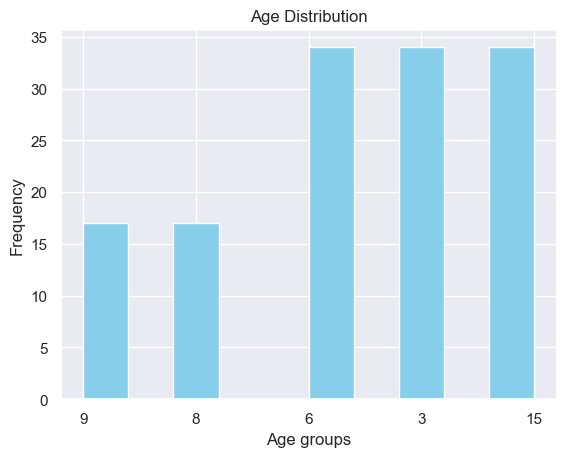

In [5]:
# Define bin edges for each group of 3 years
plt.hist(df['Age_maybe'], bins=10, color='skyblue')
plt.xlabel('Age groups')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

